### Import Libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import math
import random

In [2]:
# some helpful functions for the problem set

# plot the images
def display_image(img_name, img):
  print("\n")
  print(f"======= {img_name} =======")
  imgplot = plt.imshow(img)
  plt.show()
  print("\n")
  print(f"shape: {img.shape}")

def display_grayscale(img_name, img):
  print("\n")
  print(f"======= {img_name} =======")
  plt.figure()
  plt.title('Input Image')
  plt.imshow(img, cmap='gray')
  print("\n")
  print(f"shape: {img.shape}")
  print("\n")

# helpful print functions
def print_array(name, arr):
  print("\n")
  print(f"======= {name} =======")
  print(arr, "\n")
  print(f"shape: {arr.shape}")
  print("\n")

## **2. Frequency Smoothing**

### Grab the image



======= lena_img =======


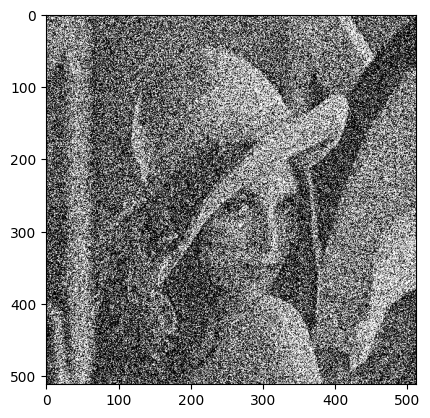



shape: (512, 512, 3)


In [3]:
# the filepath (I will assume that all images are in the same directory as the code)
lena_image_filepath = "./lenaNoise.png"
lena_img = cv2.imread(lena_image_filepath)

# display the image
display_image("lena_img", lena_img)

#### a) Compute the Fourier transform of image

In [8]:
"""
This function runs the fourier transformation on the image.
@Parameters
@Returns
"""
def fourier_transform(img):
  # convert to grayscale
  img_grayscale = rgb2gray(img)

  img_shape = img_grayscale.shape # get the shape

  # fourier transform image
  transformed_img = np.fft.fft2(a = img_grayscale)
  shifted_transformed_img = np.fft.fftshift(x = transformed_img)

  print(shifted_transformed_img.shape)

  return shifted_transformed_img

transformed_img = fourier_transform(img = lena_img)

(512, 512)


#### b) Keep different number of frequencies

In [38]:
frequencies = [7, 15, 31, 512]

# creates a mask where everything is zero and just the middle frequency has values
def create_masks(mask_shape = (5, 5), frequencies = [3]):
  masks = []

  mask = np.zeros(shape = mask_shape) # create mask of all zeros
  masking_value = 1
  # set center frequency x frequency as values
  for frequency in frequencies: # loop through frequencies
    mask = np.zeros(shape = mask_shape) # create mask of all zeros
    middle_value = int(mask_shape[0]/2) # assume its a square matrix
    middle_matrix_spread = int(frequency/2) # how far from the center of the matrix

    # get top left coordinates
    tl_row = middle_value - middle_matrix_spread
    tl_col = middle_value - middle_matrix_spread

    # fill center
    for i in range(frequency):
      row_val = tl_row + i
      for j in range(frequency):
        mask[row_val, tl_col + j] = masking_value


    masks.append(mask)

  return masks




masks = create_masks(mask_shape = (512, 512), frequencies = [7, 15, 31, 512])


c) Reconstruct the original image

In [ ]:
def reconstruct_original_image():
  return None

## **3. Implementing Gradient Descent**

### Grab images

In [ ]:
# the filepath (I will assume that all images are in the same directory as the code)
einstein_image_path = "./Einstein.jpeg"
space_marine_path = "./space-marine.png"

einstein_img = cv2.imread(einstein_image_path)
space_marine_img = cv2.imread(space_marine_path)

# plot the images to make sure they are successfully loaded
display_image(einstein_img) # display einstein image
display_image(space_marine_img)

TypeError: display_image() missing 1 required positional argument: 'img'

### Forward and Backward Difference

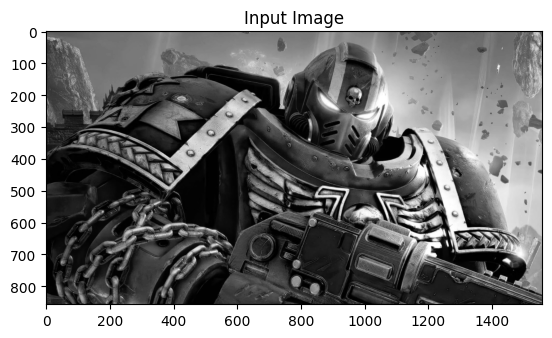

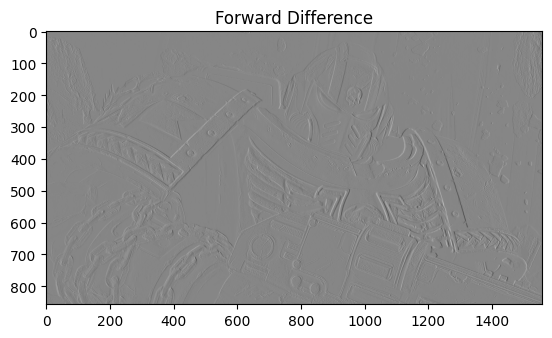

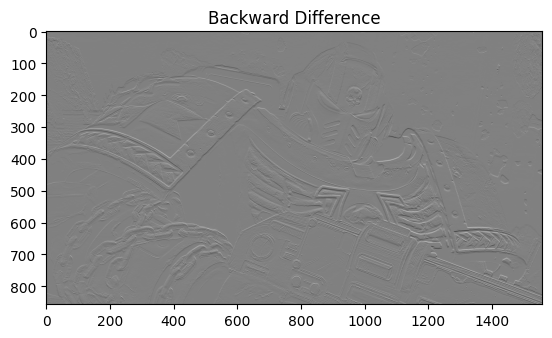

In [ ]:
def forward_difference(image):
    rows, cols = image.shape
    d = np.zeros((rows,cols))
    d[:,1:cols-1] = image[:,1:cols-1] - image[:,0:cols-2];
    d[:,0] = image[:,0] - image[:,cols-1];
    return d


def backward_difference(image):
    rows, cols = image.shape
    d = np.zeros((rows,cols))
    d[1:rows-1, :] = image[1:rows-1, :] - image[0:rows-2, :];
    d[0,:] = image[0,:] - image[rows-1,:];
    return d


## replace with your own image
img = cv2.imread('space-marine.png')
img_gray = rgb2gray(img)


## plot the image
plt.figure()
plt.title('Input Image')
plt.imshow(img_gray, cmap='gray')


## calculate forward difference and plot
forward_diff_img = forward_difference(img_gray)
plt.figure()
plt.title('Forward Difference')
plt.imshow(forward_diff_img, cmap='gray')


## calculate backward difference and plot
backward_diff_img = backward_difference(img_gray)
plt.figure()
plt.title('Backward Difference')
plt.imshow(backward_diff_img, cmap='gray')

#### **Step 1: Generate noisy image**

In [ ]:
"""
The function below makes the image noisy using gaussian additive noise.
@Parameters
  img: nd.array
    the numpy array representation of the image
  mean: int
    the mu for the guassian noise
  sigma: list(float)
    the list of sigmas to run for the gaussian image
  print_image: bool
    True if f images are to printed and False if f images are not to be printed
@Returns
  f_images: list(nd.array)
    list of the f images using all the values of sigma provided and the mean
"""
def generate_noisy_image(img, mean = 0, sigma = [1], print_image = False):
  # convert image to grayscale
  img_grayscale = rgb2gray(img)

  # grab the shape of the image
  img_shape = img_grayscale.shape
  f_images = []


  # create random noise
  for sigma_val in sigma:
    v_image = np.random.normal(loc = mean, scale = sigma_val, size = img_shape) # create noise
    f_image = np.add(img_grayscale, v_image) # add the noise
    f_images.append(f_image) # store to list


  # print the images
  if print_image:
    for f_image in f_images:
      display_grayscale(f_image)

  return f_images

# test noisy image generation
f_images = generate_noisy_image(img = einstein_img, mean = 0, sigma = [.001, .01, .1], print_image = False)

In [ ]:
# testing or viewing purposes
print(f_images[0])

[[0.25155453 0.25006141 0.25045422 ... 0.2268204  0.21737014 0.20568144]
 [0.24760225 0.24717619 0.25187282 ... 0.22397137 0.21106244 0.20264998]
 [0.24559059 0.24897637 0.2471234  ... 0.21486931 0.2077625  0.19998128]
 ...
 [0.16102008 0.15737482 0.14735563 ... 0.16433193 0.17194775 0.17312867]
 [0.16141821 0.16370973 0.15204207 ... 0.14620553 0.15270092 0.15272144]
 [0.15374583 0.16170106 0.14535857 ... 0.14295033 0.14957113 0.15628   ]]


#### **Step 2: Run Gradient Descent Denoising Algorithm**

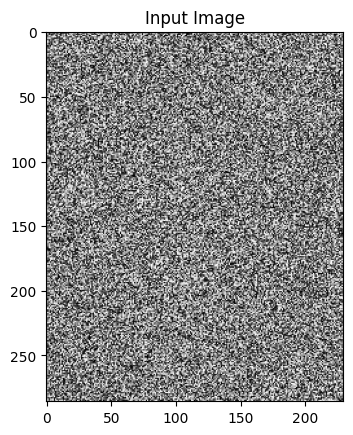

In [ ]:
"""
This function denoised the image using the gradient descent algorithm provided.
@Parameters
@Returns
"""
def gradient_descent(f_img, alpha = .01, iterations = 10, lambda_val = .1):
  img_shape = f_img.shape

  u_img = np.random.rand(img_shape[0], img_shape[1]) # generate random noise

  display_grayscale(u_img)

  for iter in range(iterations): # run the gradient descent
    euler_lagrange = -2 * lambda_val * np.subtract(f_img, u_img)
    u_img = u_img - alpha * euler_lagrange


  return None

gradient_descent(f_img = f_images[1])

#### **Step 3: Create convergence graph**